In [ ]:
#負責讀檔

import pandas as pd

# 檔案名稱
file_path = 'processed_data.csv'

try:
    # 嘗試讀取 CSV 檔案
    # pd.read_csv() 會將 CSV 轉為一個 DataFrame 物件
    df = pd.read_csv(file_path)
    
    # (可選) 印出資料的前 5 行，確認讀取成功且內容正確
    print(f"成功讀取檔案： {file_path}")
    print("資料前 5 行預覽：")
    print(df.head())
    
    # (可選) 顯示 DataFrame 的基本資訊 (欄位名稱、資料型態、是否有缺失值)
    print("\n資料基本資訊：")
    df.info()

except FileNotFoundError:
    print(f"錯誤：找不到檔案 '{file_path}'")
    print("請確認：")
    print(f"1. 檔案名稱 '{file_path}' 是否拼寫正確？")
    print("2. 這個 CSV 檔案是否和您的 Python 程式碼在同一個資料夾中？")
    print("3. 如果不在同一個資料夾，請提供完整的絕對路徑。")

except Exception as e:
    print(f"讀取檔案時發生其他錯誤： {e}")

成功讀取檔案： processed_data.csv
資料前 5 行預覽：
   rally  ball_round      time  frame_num  score_status  player_score  \
0      1           1   0:07:39    11496.0           0.0           0.0   
1      1           2  00:07:43    11582.0           0.0           0.0   
2      2           1   0:07:55    11881.0           1.0           1.0   
3      2           2   0:07:56    11900.0           1.0           1.0   
4      2           3   0:07:56    11921.0           1.0           1.0   

   opponent_score          player  server type  ...  player_move_area  \
0             0.0    Kento MOMOTA     1.0  發短球  ...              11.0   
1             0.0  CHOU Tien Chen     3.0   長球  ...              18.0   
2             0.0    Kento MOMOTA     1.0  發短球  ...              11.0   
3             0.0  CHOU Tien Chen     2.0  推撲球  ...              10.0   
4             0.0    Kento MOMOTA     2.0   殺球  ...               7.0   

   moving_x  moving_y  landing_court_number  ball_distance_x  ball_distance_y  \
0  

CHOU Tien Chen 的總得分次數: 192
CHOU Tien Chen 殺球得分次數: 78
CHOU Tien Chen 殺球得分佔總得分的百分比: 40.62%


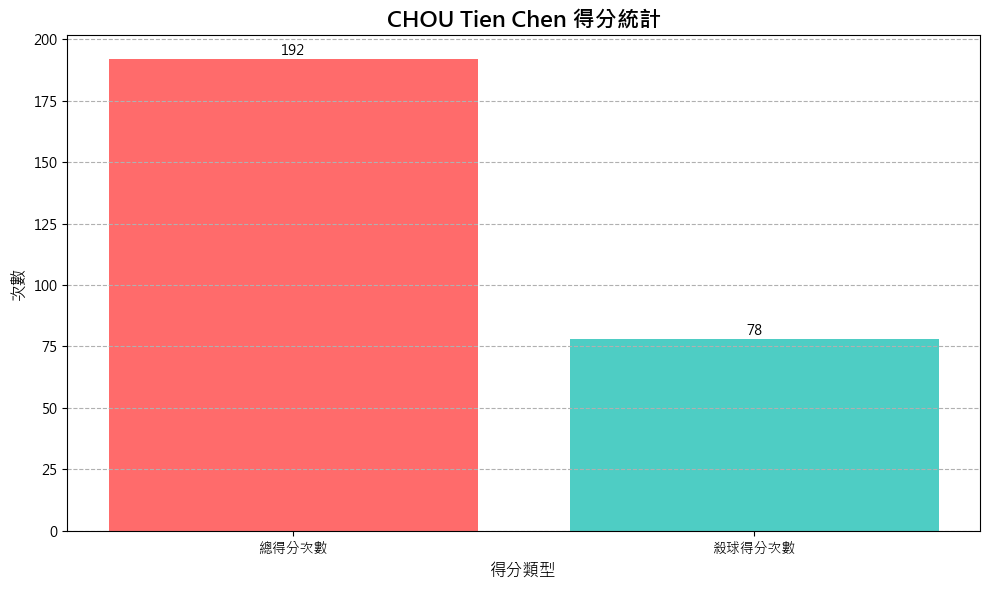

In [2]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'WenQuanYi Micro Hei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 計算 CHOU Tien Chen 的總得分次數
chou_total_wins = df[df['getpoint_player'] == 'CHOU Tien Chen'].groupby(['match_id', 'set', 'rally'])['getpoint_player'].last().size
print(f"CHOU Tien Chen 的總得分次數: {chou_total_wins}")

# 計算 CHOU Tien Chen 殺球得分的次數
chou_smash_wins = df[(df['type'] == '殺球') & (df['getpoint_player'] == 'CHOU Tien Chen')].groupby(['match_id', 'set', 'rally'])['getpoint_player'].last().size
print(f"CHOU Tien Chen 殺球得分次數: {chou_smash_wins}")

# 計算殺球得分佔總得分的百分比
if chou_total_wins > 0:
    smash_percentage = (chou_smash_wins / chou_total_wins) * 100
    print(f"CHOU Tien Chen 殺球得分佔總得分的百分比: {smash_percentage:.2f}%")
else:
    print("CHOU Tien Chen 沒有得分紀錄，無法計算百分比")
    smash_percentage = 0

# 繪製長條圖
labels = ['總得分次數', '殺球得分次數']
values = [chou_total_wins, chou_smash_wins]

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4']
bars = ax.bar(labels, values, color=colors)

# 在柱子上顯示數值
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

ax.set_xlabel('得分類型', fontsize=12)
ax.set_ylabel('次數', fontsize=12)
ax.set_title('CHOU Tien Chen 得分統計', fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle='--')

plt.tight_layout()